Here `make_regular_graph` initially generates a graph with $n$ nodes and each node having $k$ neighbors. `rewire` here, which is a modification of the one given in the textbook, creates a new edge with new start and end nodes when `flip(p)` is true, otherwise it makes no modifications to the edges.

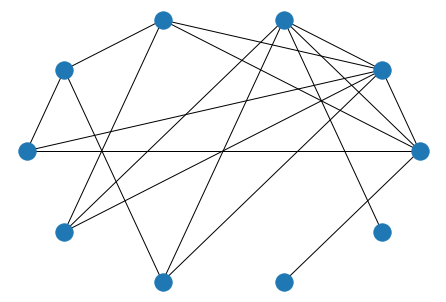

In [1]:
import networkx as nx
import numpy as np

"""Same flip function found in chapter 2"""
def flip(p):
    return np.random.random() < p

import networkx as nx

"""Same graph generator as in exercise 3.1"""
def adjacent_edges(nodes, k):
    n = len(nodes)
    
    if k%2 != 0 and n%2 != 0:                                   # Checks if n is odd and k is odd
        raise ValueError('k cannot be odd when n is odd')       # Raises the value error
    
    else:
        if k % 2 == 0:                                          # This part is similar to the one in the book
            k = k//2
            for i in range(n):
                for j in range(i+1, i+k+1):
                    yield nodes[i],nodes[j%n]                   # Except that it uses the actual values of the nodes
                
        else:                                                   # Runs this part if k is odd
            k = k-1                                             # Turns odd k into even k and repeats the above code
            k = k // 2
            for i in range(n):
                for j in range(i+1-k, i+k+1):
                    yield nodes[i],nodes[j%n]
                
                yield nodes[i],nodes[(i+n//2)%n]                # This adds an edge to the opposite node

def make_regular_graph(node, k=2):
    G = nx.Graph()                                              # Creates the initial graph G
    
    G.add_nodes_from(range(node))
    G.add_edges_from(adjacent_edges(range(node),k))             # Runs the adjacent_edges function
    
    return G

"""This creates a new edge with new start and end nodes"""
def rewire(G, p):
    nodes = set(G)
    
    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            choices = choices - {new_v}
            new_u = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(new_u, new_v)
            
"""Use this to create a graph with rewiring"""
def graph_gen(n, k=2, p=1):
    g = make_regular_graph(n, k)
        
    rewire(g, p)
    
    return g

nx.draw_circular(graph_gen(10,3,1))

The following functions are from chapter 3 in the textbook and are here only for testing purposes. These were modified only for debugging and readability purposes.

In [2]:
def node_clustering(G, u):
    
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan                     # This error pops up for low values of n and k
        
    possible = k * (k-1) / 2
    exist = 0    
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v
                
def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

def path_lengths(G):
    length_iter = nx.shortest_path_length(G)
    for source, dist_map in length_iter:
        for dest, dist in dist_map.items():
            yield dist
            
def characteristic_path_length(G):
    return np.mean(list(path_lengths(G)))

def run_one_graph(n, k, p):
    """This is a modification of the function given in chapter 3. This uses graph_gen instead of
    WS graph as defined in the textbook"""
    ws = graph_gen(n, k, p)    
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    print(mpl, cc)
    return mpl, cc

In [3]:
%timeit run_one_graph(1000, 10, .5)

3.37655 0.10101652039051419
3.376438 0.09225574066456418
3.378708 0.09901813791643511
3.372794 0.09798751906847881
3.377178 0.1004675411190117
3.362686 0.08434090956450778
3.365424 0.09051206844411178
3.373082 0.09136323783715425
2.51 s ± 8.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
ps = np.logspace(-3, 0, 9)

def run_experiment(ps, n=1000, k=10, iters=5):
    
    res = []
    for p in ps:
        print(p)
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        print(means)
        res.append(means)
    return np.array(res)

In [6]:
"""This takes a long time to run, use sparingly. This is mainly because of how gen_graph is defined which
checks list values a lot of times. However for low values of n and k this will generate a lot of
nan errors (see node_clustering above)"""

"""Wall time: 13 mins, 18s for (ps, 1000, 100, 10)"""

%time res = run_experiment(ps, 1000, 100, 10)

0.001
3.00679 0.7408267715858851
2.906354 0.7404672138537477
3.029138 0.7409126612173847
2.894078 0.7404281031011481
2.932474 0.7404538185857299
3.003448 0.7408465667603629
2.972814 0.740709852461614
2.884984 0.7400169354463942
2.993604 0.7408785729708476
3.007784 0.7408040354486062
[2.9631468  0.74063445]
0.0023713737056616554
2.697556 0.7372904064363472
2.7125 0.737429521429927
2.707176 0.7378251427158947
2.73376 0.7380914148646344
2.724692 0.7374894408545531
2.703784 0.7376409997025108
2.710686 0.7375637386247059
2.71315 0.7377884505570902
2.747538 0.7379352378073594
2.721844 0.7373423199873944
[2.7172686  0.73763967]
0.005623413251903491
2.616354 0.7319852313032229
2.621136 0.731761911336485
2.619778 0.7320049885066566
2.607776 0.7308526565403707
2.62396 0.7322318153184392
2.615714 0.7316214442270291
2.618736 0.7312602702749714
2.618374 0.7319859613527169
2.610498 0.7302911708416968
2.618476 0.7312616110661613
[2.6170802  0.73152571]
0.01333521432163324
2.513744 0.716962441181407
2

In [7]:
L, C = np.transpose(res)
L /= L[0]
C /= C[0]

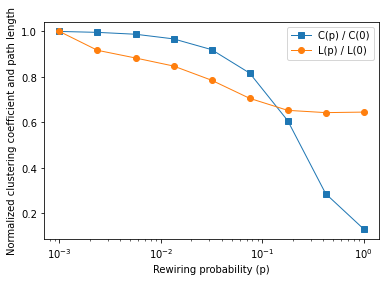

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(ps, C, 's-', linewidth=1, label='C(p) / C(0)')
plt.plot(ps, L, 'o-', linewidth=1, label='L(p) / L(0)')
plt.legend()

plt.xlabel('Rewiring probability (p)')
plt.ylabel('Normalized clustering coefficient and path length')
plt.xscale('log')
plt.show()

It can be seen here that the characteristic path length $L$ follows the same result as in the WS experiment. However for clusttering coefficient $C$, this decreases in value up (note that for $p=0$ the graph is a regular graph) until it reaches a constant value $C_0$ which is around ~0.65. This is definitely due to how the function `rewired` was defined and shows that using this version of `rewired`, the resulting graph with $p=1$ has a low path length but relatively high clustering, such that it has features of both a regular graph and a random graph.